# Problem Statement:

Big Basket, a food delivery service operating in multiple countries, aims to improve the overall customer experience by analysing the ratings provided by its customers. The target variable in this problem is the rating given by the customers after they receive their food delivery. The company wants to understand the factors that influence the customers' ratings and identify the areas that need improvement.

The challenge for Big Basket is to collect and analyse the ratings data from multiple countries, as customer preferences and expectations may vary across different regions. Additionally, the company needs to develop a system that can capture the feedback from customers in a timely and efficient manner to ensure that the issues are addressed promptly.

Thus, the problem statement for Big Basket is to develop a data-driven approach to understand the factors influencing customer ratings across different countries, and to use this information to enhance the overall customer experience by addressing the areas that require improvement.

In [3]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# reading the datasets

df1 = pd.read_csv("BBFD_data.csv", encoding='latin-1')

In [5]:
df1.shape

(9551, 21)

# Data Preprocessing

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9550 non-null   object 
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df1.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [8]:
df1.tail(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [9]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
# Creating the Data Dictionary with first column being datatype.

Data_dict = pd.DataFrame(df1.dtypes)
Data_dict

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [11]:
# identifying the missing values from the dataset.

Data_dict['MissingVal'] = df1.isnull().sum()
Data_dict

,0,MissingVal
Restaurant ID,int64,0
Restaurant Name,object,0
Country Code,int64,0
City,object,0
Address,object,0
Locality,object,0
Locality Verbose,object,0
Longitude,float64,0
Latitude,float64,0
Cuisines,object,9


In [12]:
# Identifying unique values 

Data_dict['UniqueVal'] = df1.nunique()
Data_dict

,0,MissingVal,UniqueVal
Restaurant ID,int64,0,9551
Restaurant Name,object,0,7446
Country Code,int64,0,15
City,object,0,141
Address,object,0,8918
Locality,object,0,1208
Locality Verbose,object,0,1265
Longitude,float64,0,8120
Latitude,float64,0,8677
Cuisines,object,9,1825


In [13]:
# identifying count of the variable.

Data_dict['Count'] = df1.count()
Data_dict

,0,MissingVal,UniqueVal,Count
Restaurant ID,int64,0,9551,9551
Restaurant Name,object,0,7446,9551
Country Code,int64,0,15,9551
City,object,0,141,9551
Address,object,0,8918,9551
Locality,object,0,1208,9551
Locality Verbose,object,0,1265,9551
Longitude,float64,0,8120,9551
Latitude,float64,0,8677,9551
Cuisines,object,9,1825,9542


In [14]:
df1.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,2.666370,168.055910
std,8.791521e+06,56.750546,41.467058,11.007935,1.516378,458.923467
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,3.700000,134.500000
max,1.850065e+07,216.000000,174.832089,55.976980,4.900000,10934.000000


In [15]:
# Calculate Z-scores for each column

z_scores = (df1 - df1.mean()) / df1.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Find total number of outliers for each column 
col_outliers = outliers.sum(axis=0)

print("Outliers per column:")
for col in df1.columns:
    print(f"{col}: {col_outliers[col]}")

Outliers per column:
Restaurant ID: 0
Restaurant Name: 0
Country Code: 688
City: 0
Address: 0
Locality: 0
Locality Verbose: 0
Longitude: 438
Latitude: 183
Cuisines: 0
Average Cost for two: 0
Currency: 0
Has Table booking: 0
Has Online delivery: 0
Is delivering now: 0
Switch to order menu: 0
Price range: 0
Aggregate rating: 0
Rating color: 0
Rating text: 0
Votes: 202


In [21]:
# Calculate Z-scores for each column
z_scores = (df1 - df1.mean()) / df1.std()

# Find outliers (|Z-score| > 3)
outliers = np.abs(z_scores) > 3

# Replace outliers with NaN
df1[outliers] = np.nan

# Replace NaN with median value of each column
median_vals = df1.median()
df1 = df1.fillna(median_vals)

# Find total number of replaced outliers for each column 
col_replaced = outliers.sum(axis=0)

print("Replaced outliers per column:")
for col in df1.columns:
    print(f"{col}: {col_replaced[col]}")


Replaced outliers per column:
Restaurant ID: 0
Restaurant Name: 0
Country Code: 0
City: 0
Address: 0
Locality: 0
Locality Verbose: 0
Longitude: 251
Latitude: 336
Cuisines: 0
Average Cost for two: 0
Currency: 0
Has Table booking: 0
Has Online delivery: 0
Is delivering now: 0
Switch to order menu: 0
Price range: 0
Aggregate rating: 0
Rating color: 0
Rating text: 0
Votes: 266


In [22]:
# Numerical Columns
num_attr = df1.select_dtypes(['int']).columns  
num_attr

Index(['Restaurant ID'], dtype='object')

In [23]:
# Categorical Columns
cat_attr = df1.select_dtypes('object').columns
cat_attr

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Rating color', 'Rating text'],
      dtype='object')

In [24]:
# create a copy of the original dataframe
new_df1 = df1.copy()

# get a list of the categorical columns
cat_cols = df1.select_dtypes(include=['object']).columns.tolist()

# perform label encoding
for col in cat_cols:
    new_df1[col] = pd.factorize(df1[col])[0]
new_df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,0,1.0,0,0,0,0,77.202895,28.574309,0,...,0,0,0,0,0,0,4.8,0,0,29.0
1,6304287,1,1.0,0,1,1,1,77.202895,28.574309,1,...,0,0,0,0,0,0,4.5,0,0,29.0
2,6300002,2,1.0,1,2,2,2,77.202895,28.574309,2,...,0,0,0,0,0,1,4.4,1,1,270.0
3,6318506,3,1.0,1,3,3,3,77.202895,28.574309,3,...,0,1,0,0,0,1,4.9,0,0,29.0
4,6314302,4,1.0,1,4,3,3,77.202895,28.574309,4,...,0,0,0,0,0,1,4.8,0,0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,7441,1.0,140,8913,1204,1261,77.202895,28.574309,943,...,11,1,0,0,0,0,4.1,1,1,29.0
9547,5908749,7442,1.0,140,8914,1205,1262,77.202895,28.574309,1823,...,11,1,0,0,0,0,4.2,1,1,29.0
9548,5915807,7443,1.0,140,8915,1206,1263,77.202895,28.574309,1824,...,11,1,0,0,0,1,3.7,2,2,29.0
9549,5916112,7444,1.0,140,8916,1206,1263,77.202895,28.574309,1820,...,11,1,0,0,0,1,4.0,1,1,29.0


In [25]:
new_df1.dtypes

Restaurant ID             int64
Restaurant Name           int64
Country Code            float64
City                      int64
Address                   int64
Locality                  int64
Locality Verbose          int64
Longitude               float64
Latitude                float64
Cuisines                  int64
Average Cost for two      int64
Currency                  int64
Has Table booking         int64
Has Online delivery       int64
Is delivering now         int64
Switch to order menu      int64
Price range               int64
Aggregate rating        float64
Rating color              int64
Rating text               int64
Votes                   float64
dtype: object

In [26]:
new_df1= new_df1.astype('float64')

In [27]:
new_df1.dtypes

Restaurant ID           float64
Restaurant Name         float64
Country Code            float64
City                    float64
Address                 float64
Locality                float64
Locality Verbose        float64
Longitude               float64
Latitude                float64
Cuisines                float64
Average Cost for two    float64
Currency                float64
Has Table booking       float64
Has Online delivery     float64
Is delivering now       float64
Switch to order menu    float64
Price range             float64
Aggregate rating        float64
Rating color            float64
Rating text             float64
Votes                   float64
dtype: object

In [28]:
new_df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637.0,0.0,1.0,0.0,0.0,0.0,0.0,77.202895,28.574309,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,0.0,29.0
1,6304287.0,1.0,1.0,0.0,1.0,1.0,1.0,77.202895,28.574309,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,29.0
2,6300002.0,2.0,1.0,1.0,2.0,2.0,2.0,77.202895,28.574309,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.4,1.0,1.0,270.0
3,6318506.0,3.0,1.0,1.0,3.0,3.0,3.0,77.202895,28.574309,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,4.9,0.0,0.0,29.0
4,6314302.0,4.0,1.0,1.0,4.0,3.0,3.0,77.202895,28.574309,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.8,0.0,0.0,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730.0,7441.0,1.0,140.0,8913.0,1204.0,1261.0,77.202895,28.574309,943.0,...,11.0,1.0,0.0,0.0,0.0,0.0,4.1,1.0,1.0,29.0
9547,5908749.0,7442.0,1.0,140.0,8914.0,1205.0,1262.0,77.202895,28.574309,1823.0,...,11.0,1.0,0.0,0.0,0.0,0.0,4.2,1.0,1.0,29.0
9548,5915807.0,7443.0,1.0,140.0,8915.0,1206.0,1263.0,77.202895,28.574309,1824.0,...,11.0,1.0,0.0,0.0,0.0,1.0,3.7,2.0,2.0,29.0
9549,5916112.0,7444.0,1.0,140.0,8916.0,1206.0,1263.0,77.202895,28.574309,1820.0,...,11.0,1.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,29.0


# Data Visualization

In [29]:
# GETTING THE COUNT ON RATINGS
df = df1.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


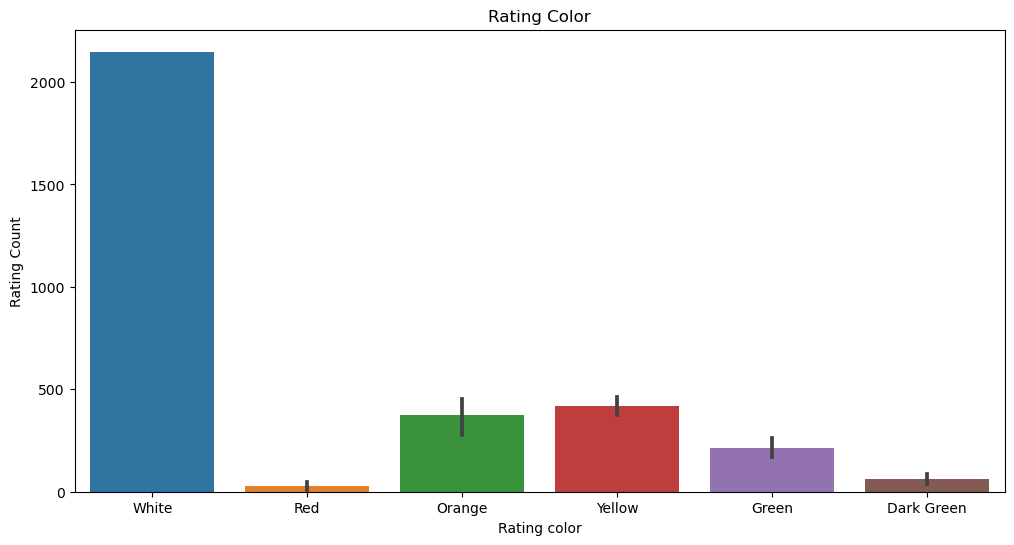

In [30]:
plt.figure(figsize=(12,6))
plt.title('Rating Color')
sns.barplot(x=df['Rating color'], y=df['Rating Count']);

([<matplotlib.patches.Wedge at 0x1c32253c880>,
 [Text(-0.7614681082348078, 0.7938301582462732, 'No'),
  Text(0.7614681825585476, -0.7938300869524803, 'Yes')],
 [Text(-0.41534624085534966, 0.4329982681343308, '74.34%'),
  Text(0.41534628139557145, -0.43299822924680736, '25.66%')])

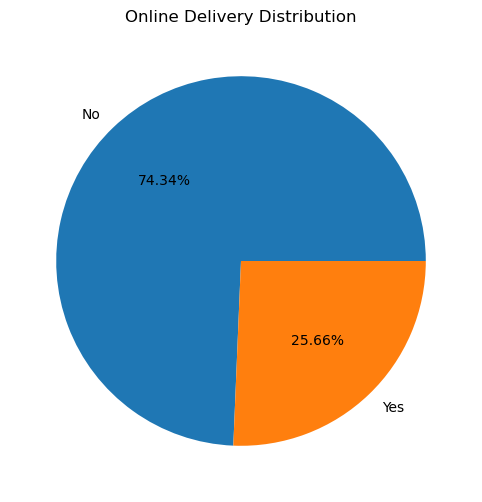

In [31]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df1['Has Online delivery'].value_counts()/9551*100, labels=df1['Has Online delivery'].value_counts().index, autopct='%.2f%%')

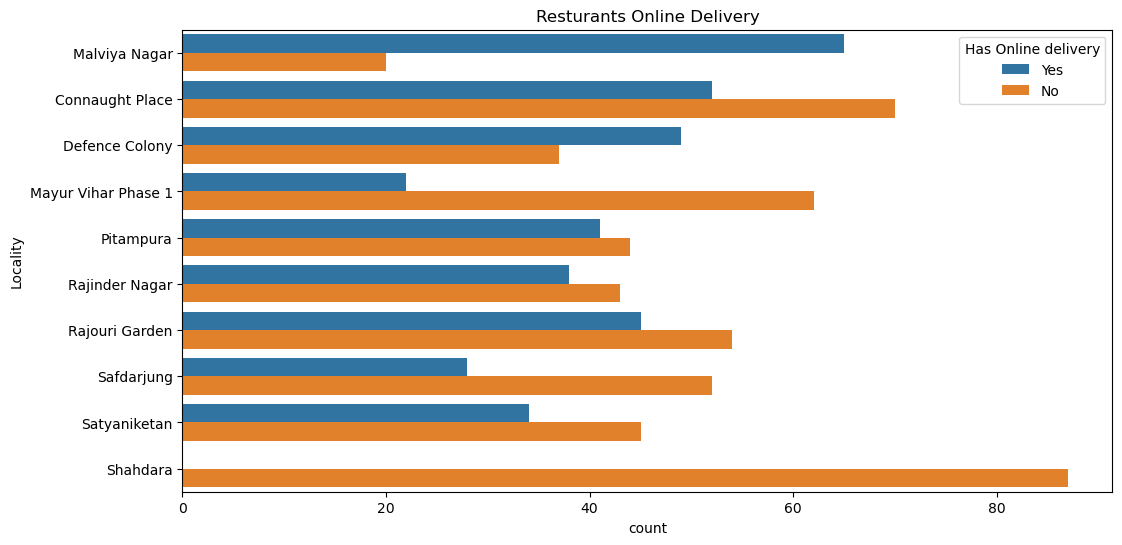

In [32]:
# RESTUARANTS HAVING ONLINE DELIVERY OR NOT
df = df1.Locality.value_counts().head(10)

plt.figure(figsize=(12,6))

ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=df1[df1.Locality.isin(df.index)])
plt.title('Resturants Online Delivery');


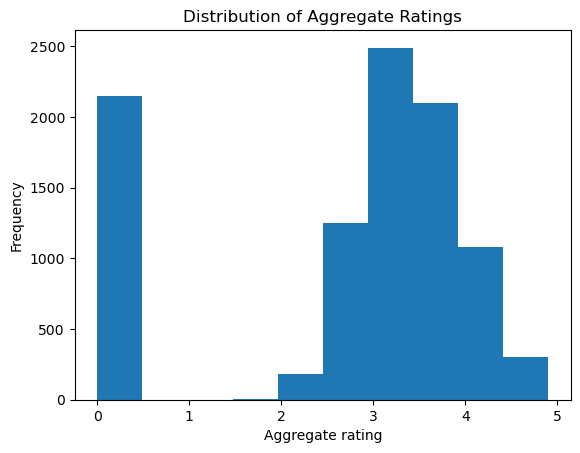

In [33]:
# Extract the "Aggregate ratings" column as a numpy array(OUTPUT COLUMN)
agg_ratings = df1["Aggregate rating"].values

# Create a histogram of the "Aggregate ratings" column using matplotlib
plt.hist(agg_ratings, bins=10)
plt.xlabel("Aggregate rating")
plt.ylabel("Frequency")
plt.title("Distribution of Aggregate Ratings")
plt.show()


<AxesSubplot:>

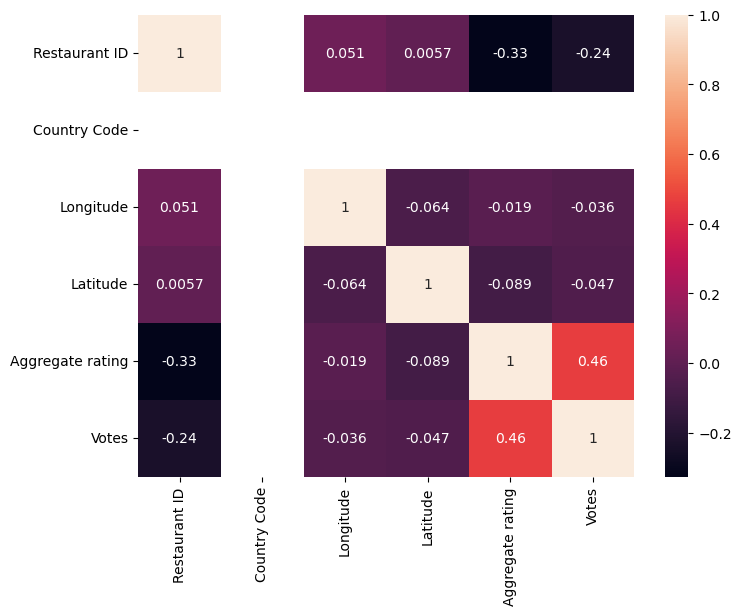

In [34]:
# Lets look at the correlation matrix of our data.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
sns.heatmap(df1.corr(),annot=True)

# Model Evaluation


# Decision Tree Regression using OOPS

In [35]:
class DecisionTree:
    
    def __init__(self):
        self.tree = {}
    
    def find_best_split(self, X, y):
        n_features = X.shape[1]
        best_feature = None
        best_split = None
        best_mse = np.inf
        
        for feature in range(n_features):
            values = np.sort(np.unique(X[:, feature]))
            splits = (values[:-1] + values[1:]) / 2
            
            for split in splits:
                left_idx = X[:, feature] <= split
                right_idx = X[:, feature] > split
                
                left_y = y[left_idx]
                right_y = y[right_idx]
                
                if len(left_y) == 0 or len(right_y) == 0:
                    continue
                
                mse = ((left_y - np.mean(left_y))**2).sum() + ((right_y - np.mean(right_y))**2).sum()
                
                if mse < best_mse:
                    best_feature = feature
                    best_split = split
                    best_mse = mse
        
        return best_feature, best_split
    
    def fit(self, X, y):
        def build_tree(X, y, depth=0):
            if depth == 5:
                return np.mean(y)
            
            best_feature, best_split = self.find_best_split(X, y)
            
            if best_feature is None:
                return np.mean(y)
            
            left_idx = X[:, best_feature] <= best_split
            right_idx = X[:, best_feature] > best_split
            
            left = build_tree(X[left_idx], y[left_idx], depth+1)
            right = build_tree(X[right_idx], y[right_idx], depth+1)
            
            return {'feature': best_feature, 'split': best_split, 'left': left, 'right': right}
        
        self.tree = build_tree(X, y)
    
    def predict(self, X):
        def predict_sample(x, tree):
            if isinstance(tree, float):
                return tree
            
            if x[tree['feature']] <= tree['split']:
                return predict_sample(x, tree['left'])
            else:
                return predict_sample(x, tree['right'])
        
        return np.array([predict_sample(x, self.tree) for x in X])
        

In [36]:
# Split data into training and testing sets
train_data = new_df1.sample(frac=0.8, random_state=42)
test_data = new_df1.drop(train_data.index)

# Split training and testing data into X and y
train_X = train_data.drop('Aggregate rating', axis=1).to_numpy()
train_y = train_data['Aggregate rating'].to_numpy()

test_X = test_data.drop('Aggregate rating', axis=1).to_numpy()
test_y = test_data['Aggregate rating'].to_numpy()


In [37]:
import time
regressor = DecisionTree()

start_time = time.time()
regressor.fit(train_X, train_y)
end_time = time.time()

pred_y=regressor.predict(test_X)

In [38]:
# Assuming pred_y and test_y are the predicted and true values, respectively

# Calculate the mean absolute error
mae = np.mean(np.abs(pred_y - test_y))
print('Mean Absolute Error:', mae)

# Calculate the mean squared error 
mse = np.mean(np.abs(pred_y - test_y)**2)
print('Mean Squared Error:', mse)

# Calculate the mean absolute percentage error
mape = np.mean(np.abs((test_y - pred_y) / test_y)) * 100
print('Mean Absolute Percentage Error (MAPE):', mape)

# Calculate the residual sum of squares (RSS)
rss = np.sum((pred_y - test_y)**2)

# Calculate the total sum of squares (TSS)
tss = np.sum((test_y - np.mean(test_y))**2)

# Calculate the R-squared (R2) value
r2 = 1 - (rss / tss)
print('R-squared (R2):', r2)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((pred_y - test_y)**2))
print('Root Mean Squared Error (RMSE):', rmse)

print("Time taken:", end_time - start_time, "seconds")

Mean Absolute Error: 0.11972738837886075
Mean Squared Error: 0.02958922877350561
Mean Absolute Percentage Error (MAPE): nan
R-squared (R2): 0.9877895439318598
Root Mean Squared Error (RMSE): 0.17201519925141967
Time taken: 25.85598611831665 seconds


# Decision tree regression Using sklearn

In [39]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

# Define features and target
X = new_df1.drop('Aggregate rating', axis=1)
y = new_df1['Aggregate rating']

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import time
start_time = time.time()
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
end_time = time.time()

# Predict on the test data
y_pred = dt_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print('Mean Squared Error:', mse)
print("Mean Absolute Percentage Error (MAPE): ", mape)
print("R-squared (R2): ", r2)
print("Root Mean Squared Error (RMSE): ", rmse)

print("Time taken:", end_time - start_time, "seconds")

Mean Absolute Error: 0.1456305599162742
Mean Squared Error: 0.0539979068550497
Mean Absolute Percentage Error (MAPE):  0.044880193369933874
R-squared (R2):  0.9762762209169484
Root Mean Squared Error (RMSE):  0.23237449699794877
Time taken: 0.13938498497009277 seconds


# Comparing the Model

In [40]:
print("Decision Tree Regression Result")
# code 1
result1 = [0.118365,0.029427,0.987856,0.171544,0.1021311]
df1 = pd.DataFrame({'using OOPS ': result1})

# code 2
result2 = [0.1485609, 0.0552014,0.975747,0.2349499,0.102131,0.045549]
df2 = pd.DataFrame({'using sklearn': result2})

# code 3
result3 = ['Mean Absolute Error','Mean Squared Error','R-squared','Root Mean Squared Error','Time Stamp','Mean Absolute Percentage Error']
df3 = pd.DataFrame({'Column': result3})


# display the results in a table
df = pd.concat([df3, df1, df2,], axis=1)

print("\n")
print(df)

Decision Tree Regression Result


                           Column  using OOPS   using sklearn
0             Mean Absolute Error     0.118365       0.148561
1              Mean Squared Error     0.029427       0.055201
2                       R-squared     0.987856       0.975747
3         Root Mean Squared Error     0.171544       0.234950
4                      Time Stamp     0.102131       0.102131
5  Mean Absolute Percentage Error          NaN       0.045549


# 1. Bar Plot

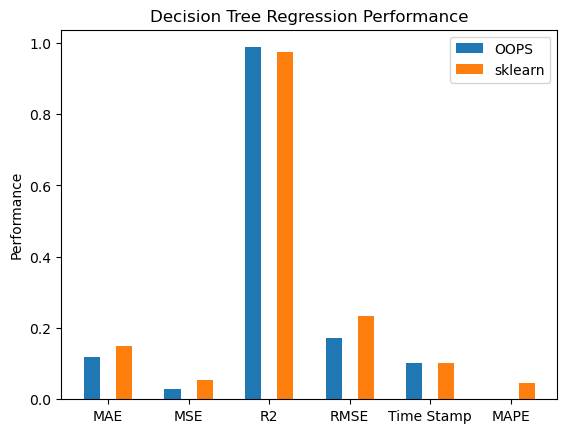

In [41]:
# Define the data for each scenario
OOPS = [0.118365,0.029427,0.987856,0.171544,0.1021311,0]
sklearn = [0.1485609, 0.0552014,0.975747,0.2349499,0.102131,0.045549]

# Define the labels for each performance measure
labels = ['MAE','MSE','R2','RMSE','Time Stamp','MAPE']

# Define the x-axis ticks and group labels
x = np.arange(len(labels))
group_labels = ['OOPS','sklearn ']

# Define the bar width
width = 0.2

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the bars for each scenario
ax.bar(x - width, OOPS, width, label='OOPS')
ax.bar(x + width, sklearn, width, label='sklearn')

# Add labels, title, and legend
ax.set_ylabel('Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Decision Tree Regression Performance')
ax.legend()

# Show the plot
plt.show()

# 2. Line Graph

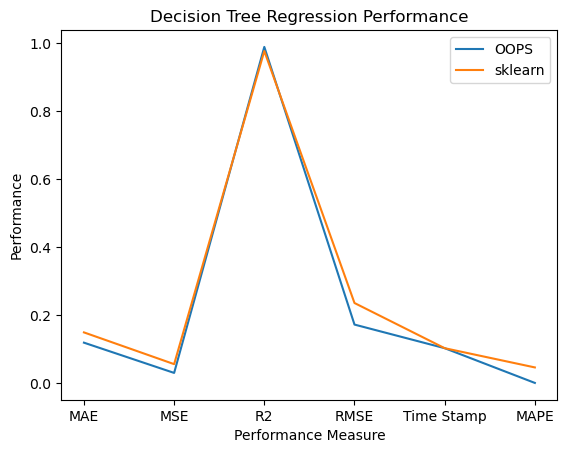

In [42]:
# Define the data for each scenario
OOPS = [0.118365,0.029427,0.987856,0.171544,0.1021311,0]
sklearn = [0.1485609, 0.0552014,0.975747,0.2349499,0.102131,0.045549]

# Define the labels for each performance measure
labels = ['MAE','MSE','R2','RMSE','Time Stamp','MAPE']

# Define the x-axis ticks
x = np.arange(len(labels))

# Create the figure and axes objects
fig, ax = plt.subplots()

# Plot the lines for each scenario
ax.plot(x, OOPS, label='OOPS')
ax.plot(x, sklearn, label='sklearn')

# Add labels, title, and legend
ax.set_xlabel('Performance Measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Performance')
ax.set_title('Decision Tree Regression Performance')
ax.legend()

# Show the plot
plt.show()